<a href="https://colab.research.google.com/github/spour/DeepExplain/blob/master/multiple_aurocs_09262021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# files are from spour98@cedar.computecanada.ca:/scratch/spour98/nn/results_benchmarking_models_25092021

In [14]:
import pandas as pd
import os
li = []
all_files = ['/content/bassett_20210924115307.csv',
             '/content/local2_20210925072150.csv', 
             '/content/model_mine_20210925071722.csv',
             '/content/resnet_20210925073300.csv']

for filename in all_files:
    title = [os.path.splitext(os.path.basename(filename))[0]]
    df = pd.read_csv(filename, index_col=None, header=0, names = title)
    li.append(df)

In [17]:
frame = pd.concat(li, axis=1)

In [19]:
frame['property'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm']

In [21]:
frame.set_index = frame['property']

In [25]:
frame

,bassett_20210924115307,local2_20210925072150,model_mine_20210925071722,resnet_20210925073300,property
0,[0.46631546 0.34324227 0.29945903 0.27007237 0...,[0.46316164 0.36704877 0.33684738 0.30755983 0...,[0.55242212 0.53979768 0.5279598 0.51716962 0...,[0.51694866 0.41141383 0.37243371 0.34073818 0...,a
1,[0.4607664 0.33157817 0.27673015 0.23285474 0...,[0.46117705 0.3628181 0.32913464 0.29540986 0...,[0.55242133 0.539798 0.5279599 0.51716924 0...,[0.5162461 0.41051224 0.37119016 0.33902678 0...,b
2,0.9768466663595861,0.9163311618078955,0.7967879867784362,0.9568829854286425,c
3,[0.7014136 0.84065527 0.88797945 0.9173347 0...,[0.70011467 0.81839037 0.8480628 0.8766966 0...,[0.5323049 0.5525598 0.56785333 0.5823276 0...,[0.59983784 0.7674206 0.81143093 0.8415508 0...,d
4,[0.42806366 0.53286145 0.44061617 0.33945462 0...,[0.97887043 0.36990374 0.34287449 0.44668485 0...,[0.54552259 0.53145591 0.52037219 0.51237282 0...,[0.48103405 0.43893972 0.377483 0.37714597 0...,e
5,[0.42019296 0.5167386 0.4110872 0.29480392 0...,[0.9759977 0.36414933 0.33315566 0.43229878 0...,[0.54552245 0.531456 0.5203723 0.51237285 0...,[0.48025545 0.4378924 0.37603235 0.37518647 0...,f
6,[0.9131386 0.94185656 0.9550244 0.9645172 0...,[0.884597 0.9163351 0.9228956 0.900436 0...,[0.74474245 0.7625504 0.78028876 0.78910565 0...,[0.8645865 0.9048021 0.89865285 0.9016794 0...,g
7,[0.84343547 0.8940306 0.91562057 0.933684 0...,[0.81710494 0.8506571 0.8664251 0.849224 0...,[0.5642515 0.57863647 0.5934645 0.60285234 0...,[0.76610994 0.8455438 0.84034526 0.84568787 0...,h
8,0.956548632024479,0.8478132334807066,0.6587923336671149,0.9211966011365392,i
9,[0.00000000e+00 0.00000000e+00 0.00000000e+00 ...,[0. 0. 0. ... 0.9120057 0...,[0. 0. 0. ... 0.998040...,[0. 0. 0. ... 0.917171...,j


In [64]:
x = frame.loc[frame['property'] == 'a']
x.iloc[0]['bassett_20210924115307']

'[0.46631546 0.34324227 0.29945903 0.27007237 0.24946104 0.2322685\n 0.22116428 0.21379866 0.21105744 0.21037553 0.20684215 0.20346804\n 0.20787702 0.20313753 0.20796284 0.2081685  0.20430539 0.20848148\n 0.20443179 0.20688355 0.20690291 0.2038325  0.20803903 0.20179949\n 0.20442676 0.20657512 0.20579618 0.20210979 0.20334855 0.20342939\n 0.2006299  0.20426908 0.20076044 0.203142   0.20111879 0.20003909\n 0.19934974 0.20194552 0.20163124 0.19556353 0.19563948 0.19605068\n 0.19735435 0.19712757 0.19647384 0.19398958 0.19385832 0.19160493\n 0.19032483 0.18997699]'

In [70]:
x.iloc[0]['bassett_20210924115307'].split()
non_decimal = re.compile(r'[^\d.]+')
# float('0.46631546')

In [106]:
import ast
import re
def isfloat(value):
  if value:
    try:
      value  = non_decimal.sub('', value)
      float(value)
      return True
    except ValueError:
      return False
  else:
    return False
l = [float(non_decimal.sub('', i))  for i in x.iloc[0]['bassett_20210924115307'].split()]

In [100]:
x.T.index[:len(x.T.index)-1]

# x.T.loc['bassett_20210924115307']
# l = [float(non_decimal.sub('', i))  for i in x.T.loc['bassett_20210924115307'][0].split()]

# plt.plot(l)

Index(['bassett_20210924115307', 'local2_20210925072150',
       'model_mine_20210925071722', 'resnet_20210925073300'],
      dtype='object')

In [113]:
l = [float(non_decimal.sub('', i))  for i in x.T.loc['model_mine_20210925071722'][0].split() if isfloat(i)]

In [126]:
frame.loc[2, 'bassett_20210924115307']

'0.9768466663595861'

bassett_20210924115307
local2_20210925072150
model_mine_20210925071722
resnet_20210925073300


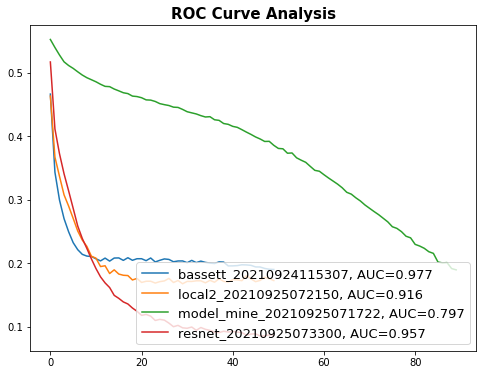

In [128]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,6))

for i in x.T.index[:len(x.T.index)-1]:
    print(i)
    l = [float(non_decimal.sub('', i))  for i in x.T.loc[i][0].split() if isfloat(i)]
    plt.plot(l , label = "{}, AUC={:.3f}".format(i, float(frame.loc[2, i])))
            #  label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

reset with labels

In [20]:
import pandas as pd
import os
li = []
all_files = ['/content/bassett_20210925190602.csv',
             '/content/local2_20210925181637.csv',
             '/content/local_20210925175825.csv',
             '/content/model_mine_20210925181245.csv',
             '/content/resnet_20210925181906.csv']

for filename in all_files:
    title = [os.path.splitext(os.path.basename(filename))[0]]
    df = pd.read_csv(filename, index_col=None, header=0, names = title, sep = '\t')
    print(df.shape)
    li.append(df)

(14, 1)
(14, 1)
(14, 1)
(14, 1)
(14, 1)


In [21]:
frame = pd.concat(li, axis=1)

In [22]:
non_decimal = re.compile(r'[^\d.]+')
non_decimal2 = re.compile(r'[^\d.e-]+')

In [23]:
import ast
import re
def isfloat(value):
  if value:
    try:
      value  = non_decimal.sub('', value)
      float(value)
      return True
    except ValueError:
      return False
  else:
    return False
# l = [float(non_decimal.sub('', i))  for i in x.iloc[0]['bassett_20210924115307'].split()]

In [11]:
frame.columns

Index(['bassett_20210925190602', 'local2_20210925181637',
       'local_20210925175825', 'model_mine_20210925181245',
       'resnet_20210925181906'],
      dtype='object')

In [ ]:
[float(non_decimal2.sub('', i)) for i in frame.T.loc['local_20210925175825']['tpr_test'].split()]

In [204]:
# m = frame.loc['tpr_test', 'bassett_20210925101805']

# # float(non_decimal2.sub('', '9.41489362e-01'))
# # fpr = [float(non_decimal2.sub('', i))  for i in frame.T.loc['local2_20210925100940']['fpr_test'].split() if isfloat(i)]
# # tpr = [float(non_decimal2.sub('', i))  for i in frame.T.loc['local2_20210925100940']['tpr_test'].split() if isfloat(i)]
# # plt.plot(fpr, tpr , label = "{}".format(better_names[i]))


# fpr = [  for i in frame.T.loc['local2_20210925100940']['fpr_test'].split() if isfloat(i)]
# tpr = [float(i)  for i in frame.T.loc['local2_20210925100940']['tpr_test'].split() if isfloat(i)]
# plt.plot(tpr, fpr , label = "{}".format(better_names[i]))


ValueError: ignored

In [16]:
frame.T.columns

Index(['loss', 'binary_crossentropy', 'auc', 'auc_1', 'val_loss',
       'val_binary_crossentropy', 'val_auc', 'val_auc_1', 'auc_test',
       'auprc_test', 'fpr_test', 'tpr_test', 'precision_test', 'recall_test',
       'auroc_test'],
      dtype='object')

bassett_20210925190602
local2_20210925181637
local_20210925175825
model_mine_20210925181245
resnet_20210925181906


<Figure size 1600x1200 with 0 Axes>

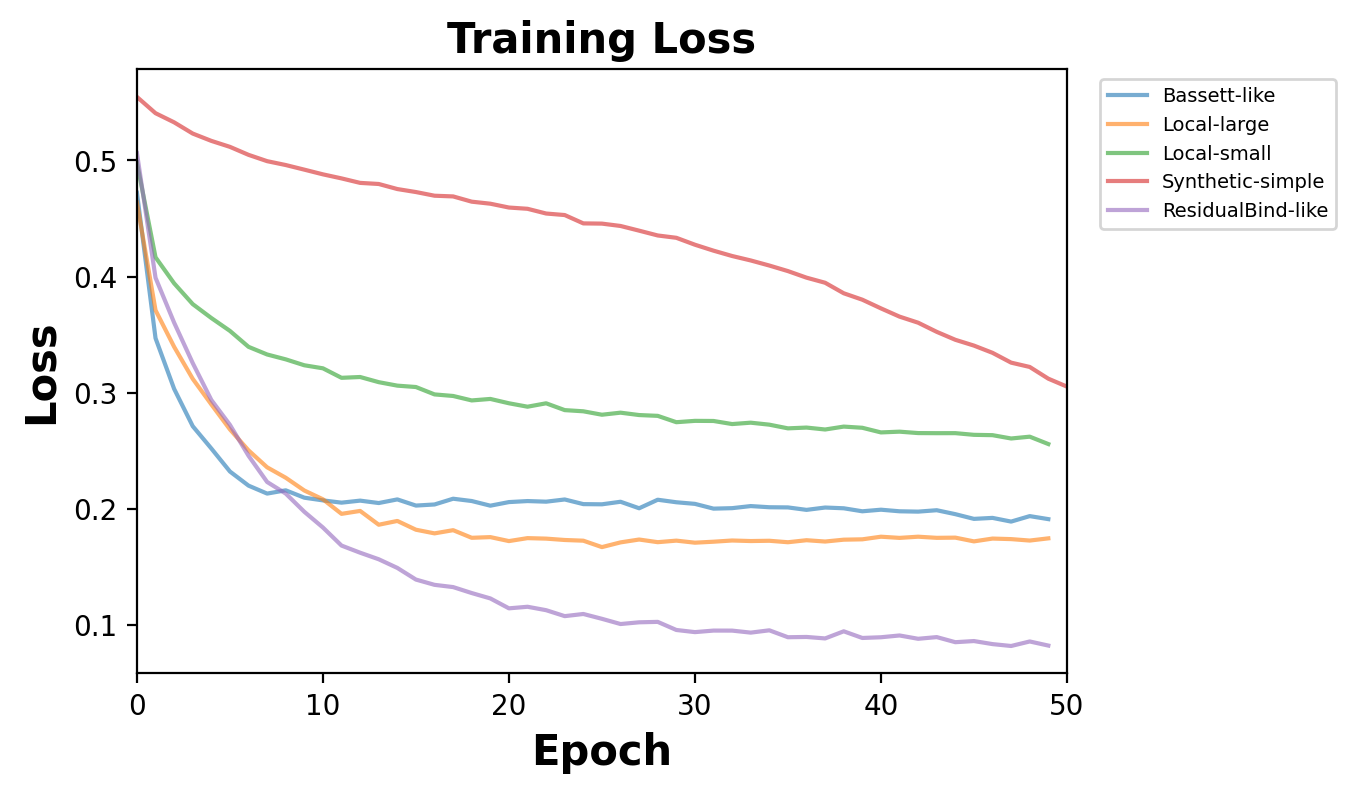

In [78]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
fig = plt.figure(figsize=(8,6))
better_names = {'bassett_20210925190602': 'Bassett-like',
                'local2_20210925181637' : 'Local-large',
                'local_20210925175825' : 'Local-small',
                'model_mine_20210925181245': 'Synthetic-simple',
                'resnet_20210925181906': 'ResidualBind-like'}
colours  = {'bassett_20210925190602': 'tab:blue',
            'local2_20210925181637' : 'tab:orange',
            'local_20210925175825' : 'tab:green',
            'model_mine_20210925181245': 'tab:red',
            'resnet_20210925181906': 'tab:purple'
}
fig, ax = plt.subplots()
for i in frame.T.index:
    print(i)
    loss = [float(non_decimal2.sub('', i))  for i in frame.T.loc[i]['loss'].split() if isfloat(i)]
    train = [float(non_decimal2.sub('', i))  for i in frame.T.loc[i]['auc_1'].split() if isfloat(i)]
    val = [float(non_decimal2.sub('', i))  for i in frame.T.loc[i]['val_auc_1'].split() if isfloat(i)]
    # tpr = [float(non_decimal2.sub('', i))  for i in frame.T.loc[i]['recall_test'].split() if isfloat(i)]
    ax.plot( loss , label = "{}".format(better_names[i]), color= colours[i], alpha = 0.6)
    # ax.plot( val , linestyle= 'dashed', color= colours[i], alpha = 0.6)
            #  label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

# dummy_lines = []
# for b_idx, b in enumerate(['-', "--"]):
#     dummy_lines.append(plt.plot([],[], c="black", ls = ['-', "--"][b_idx])[0])
# legend2 = plt.legend([dummy_lines[i] for i in [0,1]], ["Training", "Validation"], loc=4, bbox_to_anchor=(1.205,0.6), prop={'size':7})
# ax.add_artist(legend2)
plt.title('Training Loss', fontweight='bold', fontsize=15)
plt.legend(prop={'size':7}, loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Epoch", fontsize=15, fontweight='bold',)
plt.ylabel("Loss", fontsize = 15, fontweight='bold',)
plt.xlim([0,50])
# plt.ylim([0,1])
plt.show()